Celda 1: Importaciones


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os 

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_2015_eda.log"),  
        logging.StreamHandler()
    ]
)

logging.info("Inicio del notebook de EDA (001_2015_eda.ipynb).")

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2025-05-20 17:44:35,472 - INFO - Inicio del notebook de EDA (001_2015_eda.ipynb).


In [2]:
# --- Definición de la ruta al archivo ---
# Asegúrate de que esta ruta sea accesible desde donde ejecutas el notebook/script.
# La ruta proporcionada es absoluta, lo cual es bueno para evitar ambigüedades.
file_path = "/home/nicolas/Escritorio/workshops ETL/workshop_3/data/raw/2015.csv"

# También podrías construir la ruta de forma más dinámica si tu script está en el proyecto:
# project_root = "/home/nicolas/Escritorio/workshops ETL/workshop_3"
# file_path = os.path.join(project_root, "data", "raw", "2015.csv")

logging.info(f"Ruta del archivo a cargar: {file_path}")

# --- Carga del archivo CSV en un DataFrame de Pandas ---
df_2015 = None # Inicializar por si falla la carga

try:
    logging.info(f"Intentando cargar el archivo CSV: {os.path.basename(file_path)}")
    df_2015 = pd.read_csv(file_path)
    logging.info(f"Archivo {os.path.basename(file_path)} cargado exitosamente.")
    logging.info(f"El DataFrame tiene {df_2015.shape[0]} filas y {df_2015.shape[1]} columnas.")

except FileNotFoundError:
    logging.error(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except pd.errors.EmptyDataError:
    logging.error(f"Error: El archivo {os.path.basename(file_path)} está vacío.")
except pd.errors.ParserError:
    logging.error(f"Error: No se pudo parsear el archivo {os.path.basename(file_path)}. Verifica el formato del CSV.")
except Exception as e:
    logging.error(f"Ocurrió un error inesperado al cargar {os.path.basename(file_path)}: {e}")

# Ahora puedes continuar con los siguientes pasos usando df_2015 si la carga fue exitosa.

2025-05-20 17:44:35,480 - INFO - Ruta del archivo a cargar: /home/nicolas/Escritorio/workshops ETL/workshop_3/data/raw/2015.csv
2025-05-20 17:44:35,482 - INFO - Intentando cargar el archivo CSV: 2015.csv
2025-05-20 17:44:35,484 - INFO - Archivo 2015.csv cargado exitosamente.
2025-05-20 17:44:35,485 - INFO - El DataFrame tiene 158 filas y 12 columnas.


In [3]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Mostrando las primeras 5 filas del DataFrame en formato Markdown.")
    print("\nPrimeras 5 filas del DataFrame (Markdown):")
    print(df_2015.head().to_markdown(index=False)) # index=False para no incluir el índice del DataFrame en Markdown
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:35,491 - INFO - Mostrando las primeras 5 filas del DataFrame en formato Markdown.



Primeras 5 filas del DataFrame (Markdown):
| Country     | Region         |   Happiness Rank |   Happiness Score |   Standard Error |   Economy (GDP per Capita) |   Family |   Health (Life Expectancy) |   Freedom |   Trust (Government Corruption) |   Generosity |   Dystopia Residual |
|:------------|:---------------|-----------------:|------------------:|-----------------:|---------------------------:|---------:|---------------------------:|----------:|--------------------------------:|-------------:|--------------------:|
| Switzerland | Western Europe |                1 |             7.587 |          0.03411 |                    1.39651 |  1.34951 |                    0.94143 |   0.66557 |                         0.41978 |      0.29678 |             2.51738 |
| Iceland     | Western Europe |                2 |             7.561 |          0.04884 |                    1.30232 |  1.40223 |                    0.94784 |   0.62877 |                         0.14145 |      0.4363  |       

In [4]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Obteniendo la lista de todas las columnas del DataFrame.")
    column_list = df_2015.columns.tolist()
    
    print("\nLista de columnas:")
    for i, col in enumerate(column_list):
        print(f"{i+1}. {col}")
    logging.info(f"El DataFrame tiene {len(column_list)} columnas.")
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:35,502 - INFO - Obteniendo la lista de todas las columnas del DataFrame.
2025-05-20 17:44:35,503 - INFO - El DataFrame tiene 12 columnas.



Lista de columnas:
1. Country
2. Region
3. Happiness Rank
4. Happiness Score
5. Standard Error
6. Economy (GDP per Capita)
7. Family
8. Health (Life Expectancy)
9. Freedom
10. Trust (Government Corruption)
11. Generosity
12. Dystopia Residual


In [5]:
# Mostrar la lista única de todas las regiones presentes en el DataFrame
if 'df_2015' in locals() and df_2015 is not None:
    regiones_unicas = df_2015['Region'].unique()
    print("Lista de todas las regiones:")
    for region in regiones_unicas:
        print(region)
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

Lista de todas las regiones:
Western Europe
North America
Australia and New Zealand
Middle East and Northern Africa
Latin America and Caribbean
Southeastern Asia
Central and Eastern Europe
Eastern Asia
Sub-Saharan Africa
Southern Asia


In [6]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Verificando la existencia de filas duplicadas.")
    
    # Contar el número de filas duplicadas
    # duplicated() marca todas las ocurrencias de una fila duplicada como True, excepto la primera.
    # Para contar todas menos una de cada grupo de duplicados, usamos .sum()
    num_duplicated_rows = df_2015.duplicated().sum()
    
    if num_duplicated_rows > 0:
        logging.info(f"Se encontraron {num_duplicated_rows} fila(s) duplicada(s).")
        print(f"\nEl DataFrame contiene {num_duplicated_rows} fila(s) duplicada(s).")
        # Si quieres ver las filas duplicadas (excepto la primera ocurrencia):
        # print("\nFilas duplicadas (mostrando las ocurrencias posteriores a la primera):")
        # print(df_2015[df_2015.duplicated(keep='first')].to_markdown(index=False))
        # Si quieres ver TODAS las filas que tienen al menos un duplicado:
        # print("\nTodas las filas que forman parte de un grupo de duplicados:")
        # print(df_2015[df_2015.duplicated(keep=False)].sort_values(by=df_2015.columns.tolist()).to_markdown(index=False))

    else:
        logging.info("No se encontraron filas duplicadas en el DataFrame.")
        print("\nNo hay filas duplicadas en el DataFrame.")
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:35,519 - INFO - Verificando la existencia de filas duplicadas.
2025-05-20 17:44:35,521 - INFO - No se encontraron filas duplicadas en el DataFrame.



No hay filas duplicadas en el DataFrame.


In [7]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Mostrando información del DataFrame (sin conteo de no nulos).")
    print("\nInformación del DataFrame (sin conteo de no nulos):")
    # El parámetro show_counts=False oculta la columna "Non-Null Count"
    # Si esta opción no está disponible en tu versión de pandas,
    # df_2015.info() se mostrará con la información completa.
    try:
        df_2015.info()
    except TypeError: # Manejo para versiones de pandas < 1.0.0
        logging.warning("La opción 'show_counts=False' no está disponible en tu versión de Pandas. Mostrando info() completa.")
        df_2015.info()
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:35,529 - INFO - Mostrando información del DataFrame (sin conteo de no nulos).



Información del DataFrame (sin conteo de no nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dt

In [8]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas numéricas.")
    
    # .describe() por defecto opera sobre columnas numéricas
    descriptive_stats_numeric = df_2015.describe()
    
    print("\nEstadísticas Descriptivas de las Columnas Numéricas:")
    print(descriptive_stats_numeric.to_markdown())
    
    logging.info("Estadísticas descriptivas numéricas calculadas y mostradas.")
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:35,541 - INFO - Calculando estadísticas descriptivas para las columnas numéricas.
2025-05-20 17:44:35,554 - INFO - Estadísticas descriptivas numéricas calculadas y mostradas.



Estadísticas Descriptivas de las Columnas Numéricas:
|       |   Happiness Rank |   Happiness Score |   Standard Error |   Economy (GDP per Capita) |     Family |   Health (Life Expectancy) |    Freedom |   Trust (Government Corruption) |   Generosity |   Dystopia Residual |
|:------|-----------------:|------------------:|-----------------:|---------------------------:|-----------:|---------------------------:|-----------:|--------------------------------:|-------------:|--------------------:|
| count |         158      |         158       |      158         |                 158        | 158        |                 158        | 158        |                      158        |   158        |           158       |
| mean  |          79.4937 |           5.37573 |        0.0478847 |                   0.846137 |   0.991046 |                   0.630259 |   0.428615 |                        0.143422 |     0.237296 |             2.09898 |
| std   |          45.7544 |           1.14501 |      

In [9]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas de tipo 'object'.")
    
    # Seleccionar solo columnas de tipo 'object'
    object_columns = df_2015.select_dtypes(include=['object']).columns
    
    if not object_columns.empty:
        # .describe(include=['object']) para obtener estadísticas de columnas categóricas/object
        descriptive_stats_object = df_2015.describe(include=['object'])
        
        print("\nEstadísticas Descriptivas de las Columnas de Tipo 'Object':")
        print(descriptive_stats_object.to_markdown())
        
        logging.info("Estadísticas descriptivas para columnas 'object' calculadas y mostradas.")
    else:
        logging.info("No se encontraron columnas de tipo 'object' en el DataFrame.")
        print("\nNo hay columnas de tipo 'object' para analizar.")
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:35,562 - INFO - Calculando estadísticas descriptivas para las columnas de tipo 'object'.
2025-05-20 17:44:35,566 - INFO - Estadísticas descriptivas para columnas 'object' calculadas y mostradas.



Estadísticas Descriptivas de las Columnas de Tipo 'Object':
|        | Country   | Region             |
|:-------|:----------|:-------------------|
| count  | 158       | 158                |
| unique | 158       | 10                 |
| top    | Togo      | Sub-Saharan Africa |
| freq   | 1         | 40                 |


2025-05-20 17:44:35,575 - INFO - Iniciando el cálculo de la correlación gráfica para df_2015.
2025-05-20 17:44:35,577 - INFO - Columnas numéricas identificadas en df_2015: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2025-05-20 17:44:35,577 - INFO - Columnas a excluir del heatmap de correlación de features: ['Happiness Rank', 'Standard Error', 'Dystopia Residual']
2025-05-20 17:44:35,577 - INFO - Columnas seleccionadas para el heatmap de correlación de features (df_2015): ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
2025-05-20 17:44:35,578 - INFO - Matriz de correlación de features calculada para df_2015.


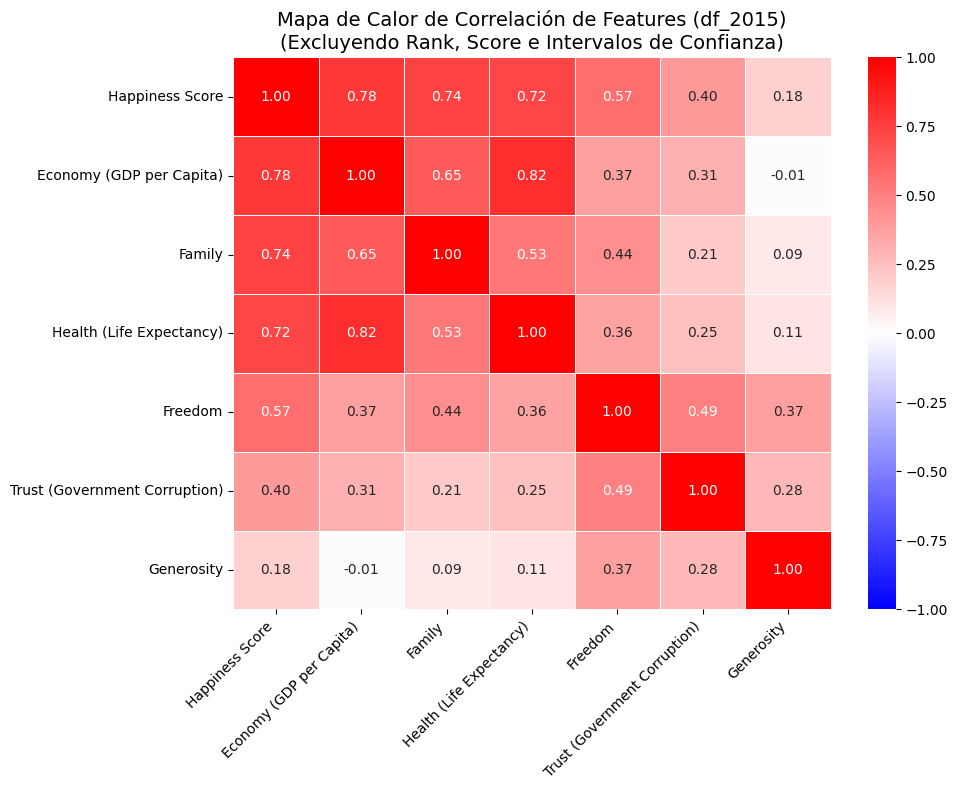

2025-05-20 17:44:35,849 - INFO - Mapa de calor de correlación de features generado y mostrado para df_2015.


In [10]:
# --- Generar y visualizar la matriz de correlación (Heatmap) para df_2015 ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Iniciando el cálculo de la correlación gráfica para df_2015.")

    # 1. Seleccionar columnas numéricas
    numeric_cols = df_2015.select_dtypes(include=np.number).columns.tolist()
    logging.info(f"Columnas numéricas identificadas en df_2015: {numeric_cols}")

    # 2. Columnas a excluir del análisis de correlación de features
    cols_to_exclude_from_features_heatmap = [
        'Happiness Rank',       # Excluimos el rank
        'Standard Error',       # Excluimos el error estándar
        'Dystopia Residual'     # Excluimos el residual de distopía
    ]
    # Filtrar las que efectivamente estén en el DataFrame
    actual_cols_to_exclude = [col for col in cols_to_exclude_from_features_heatmap if col in numeric_cols]
    logging.info(f"Columnas a excluir del heatmap de correlación de features: {actual_cols_to_exclude}")

    # 3. Columnas finales para correlación
    cols_for_correlation = [col for col in numeric_cols if col not in actual_cols_to_exclude]

    if not cols_for_correlation:
        logging.warning("No quedan columnas numéricas para el análisis de correlación de features después de la exclusión en df_2015.")
        print("\nNo hay columnas numéricas suficientes para el heatmap de correlación de features en df_2015.")
    else:
        logging.info(f"Columnas seleccionadas para el heatmap de correlación de features (df_2015): {cols_for_correlation}")
        
        # 4. Sub-DataFrame y matriz de correlación
        df_correlation_subset = df_2015[cols_for_correlation]
        correlation_matrix = df_correlation_subset.corr()
        logging.info("Matriz de correlación de features calculada para df_2015.")

        # 5. Visualizar con heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            correlation_matrix,
            annot=True,
            cmap='bwr',
            fmt=".2f",
            linewidths=.5,
            vmin=-1,
            vmax=1,
            center=0
        )
        plt.title(
            'Mapa de Calor de Correlación de Features (df_2015)\n'
            '(Excluyendo Rank, Score e Intervalos de Confianza)',
            fontsize=14
        )
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        logging.info("Mapa de calor de correlación de features generado y mostrado para df_2015.")

else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:35,859 - INFO - Generando matriz 2x2 de gráficos de dispersión.


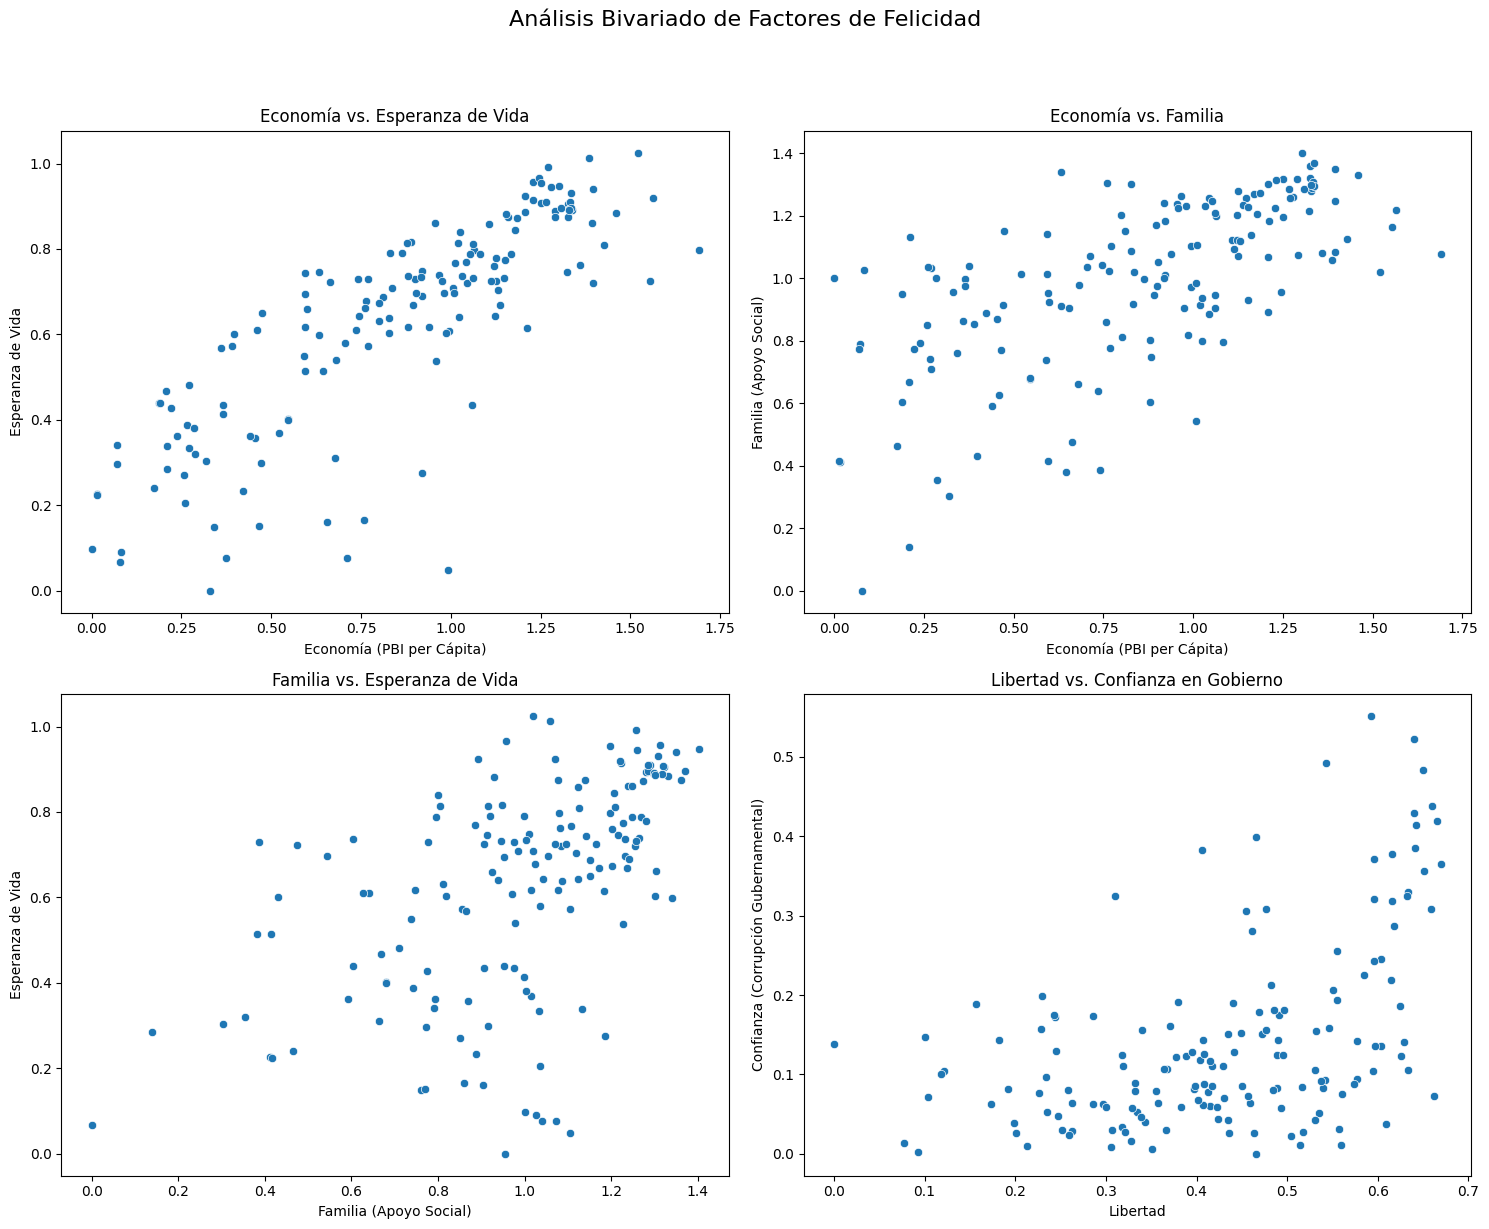

2025-05-20 17:44:36,378 - INFO - Matriz 2x2 de gráficos de dispersión mostrada.


In [11]:
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Generando matriz 2x2 de gráficos de dispersión.")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # Crear una figura con 2x2 subplots
    fig.suptitle('Análisis Bivariado de Factores de Felicidad', fontsize=16, y=1.02)

    # Gráfica 1: Economy vs Health
    sns.scatterplot(ax=axes[0, 0], data=df_2015, x='Economy (GDP per Capita)', y='Health (Life Expectancy)')
    axes[0, 0].set_title('Economía vs. Esperanza de Vida')
    axes[0, 0].set_xlabel('Economía (PBI per Cápita)')
    axes[0, 0].set_ylabel('Esperanza de Vida')
    
    # Gráfica 2: Economy vs Family
    sns.scatterplot(ax=axes[0, 1], data=df_2015, x='Economy (GDP per Capita)', y='Family')
    axes[0, 1].set_title('Economía vs. Familia')
    axes[0, 1].set_xlabel('Economía (PBI per Cápita)')
    axes[0, 1].set_ylabel('Familia (Apoyo Social)')

    # Gráfica 3: Family vs Health
    sns.scatterplot(ax=axes[1, 0], data=df_2015, x='Family', y='Health (Life Expectancy)')
    axes[1, 0].set_title('Familia vs. Esperanza de Vida')
    axes[1, 0].set_xlabel('Familia (Apoyo Social)')
    axes[1, 0].set_ylabel('Esperanza de Vida')

    # Gráfica 4: Freedom vs Trust (sustituyendo el duplicado)
    sns.scatterplot(ax=axes[1, 1], data=df_2015, x='Freedom', y='Trust (Government Corruption)')
    axes[1, 1].set_title('Libertad vs. Confianza en Gobierno')
    axes[1, 1].set_xlabel('Libertad')
    axes[1, 1].set_ylabel('Confianza (Corrupción Gubernamental)')

    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar layout para que el suptitle no se superponga
    plt.show()
    logging.info("Matriz 2x2 de gráficos de dispersión mostrada.")

else:
    logging.info("Error (simulado como info): El DataFrame df_2015 no está cargado. Ejecuta la celda de carga primero.")

2025-05-20 17:44:36,384 - INFO - Generando gráfico de dispersión Generosity vs Economy.


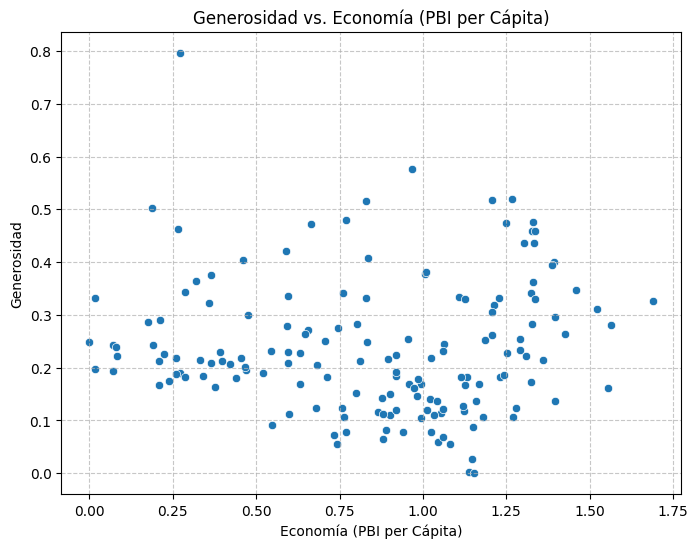

2025-05-20 17:44:36,503 - INFO - Gráfico de dispersión Generosidad vs. Economía mostrado.


In [12]:
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Generando gráfico de dispersión Generosity vs Economy.")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_2015, x='Economy (GDP per Capita)', y='Generosity')
    plt.title('Generosidad vs. Economía (PBI per Cápita)')
    plt.xlabel('Economía (PBI per Cápita)')
    plt.ylabel('Generosidad')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    logging.info("Gráfico de dispersión Generosidad vs. Economía mostrado.")

else:
    logging.info("Error (simulado como info): El DataFrame df_2015 no está cargado. Ejecuta la celda de carga primero.")

2025-05-20 17:44:36,511 - INFO - Generando gráfico de dispersión Standard Error vs Health.


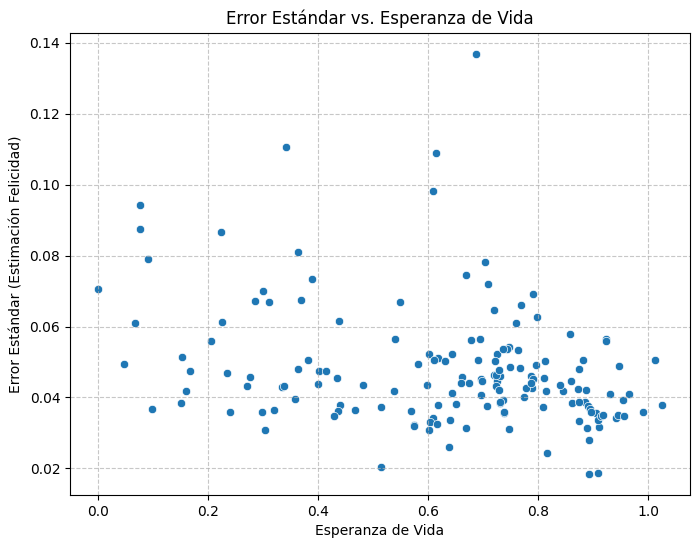

2025-05-20 17:44:36,611 - INFO - Gráfico de dispersión Error Estándar vs. Esperanza de Vida mostrado.


In [13]:
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Generando gráfico de dispersión Standard Error vs Health.")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_2015, x='Health (Life Expectancy)', y='Standard Error')
    plt.title('Error Estándar vs. Esperanza de Vida')
    plt.xlabel('Esperanza de Vida')
    plt.ylabel('Error Estándar (Estimación Felicidad)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    logging.info("Gráfico de dispersión Error Estándar vs. Esperanza de Vida mostrado.")

else:
    logging.info("Error (simulado como info): El DataFrame df_2015 no está cargado. Ejecuta la celda de carga primero.")

2025-05-20 17:44:36,619 - INFO - Generando matriz de histogramas/KDE para variables seleccionadas.


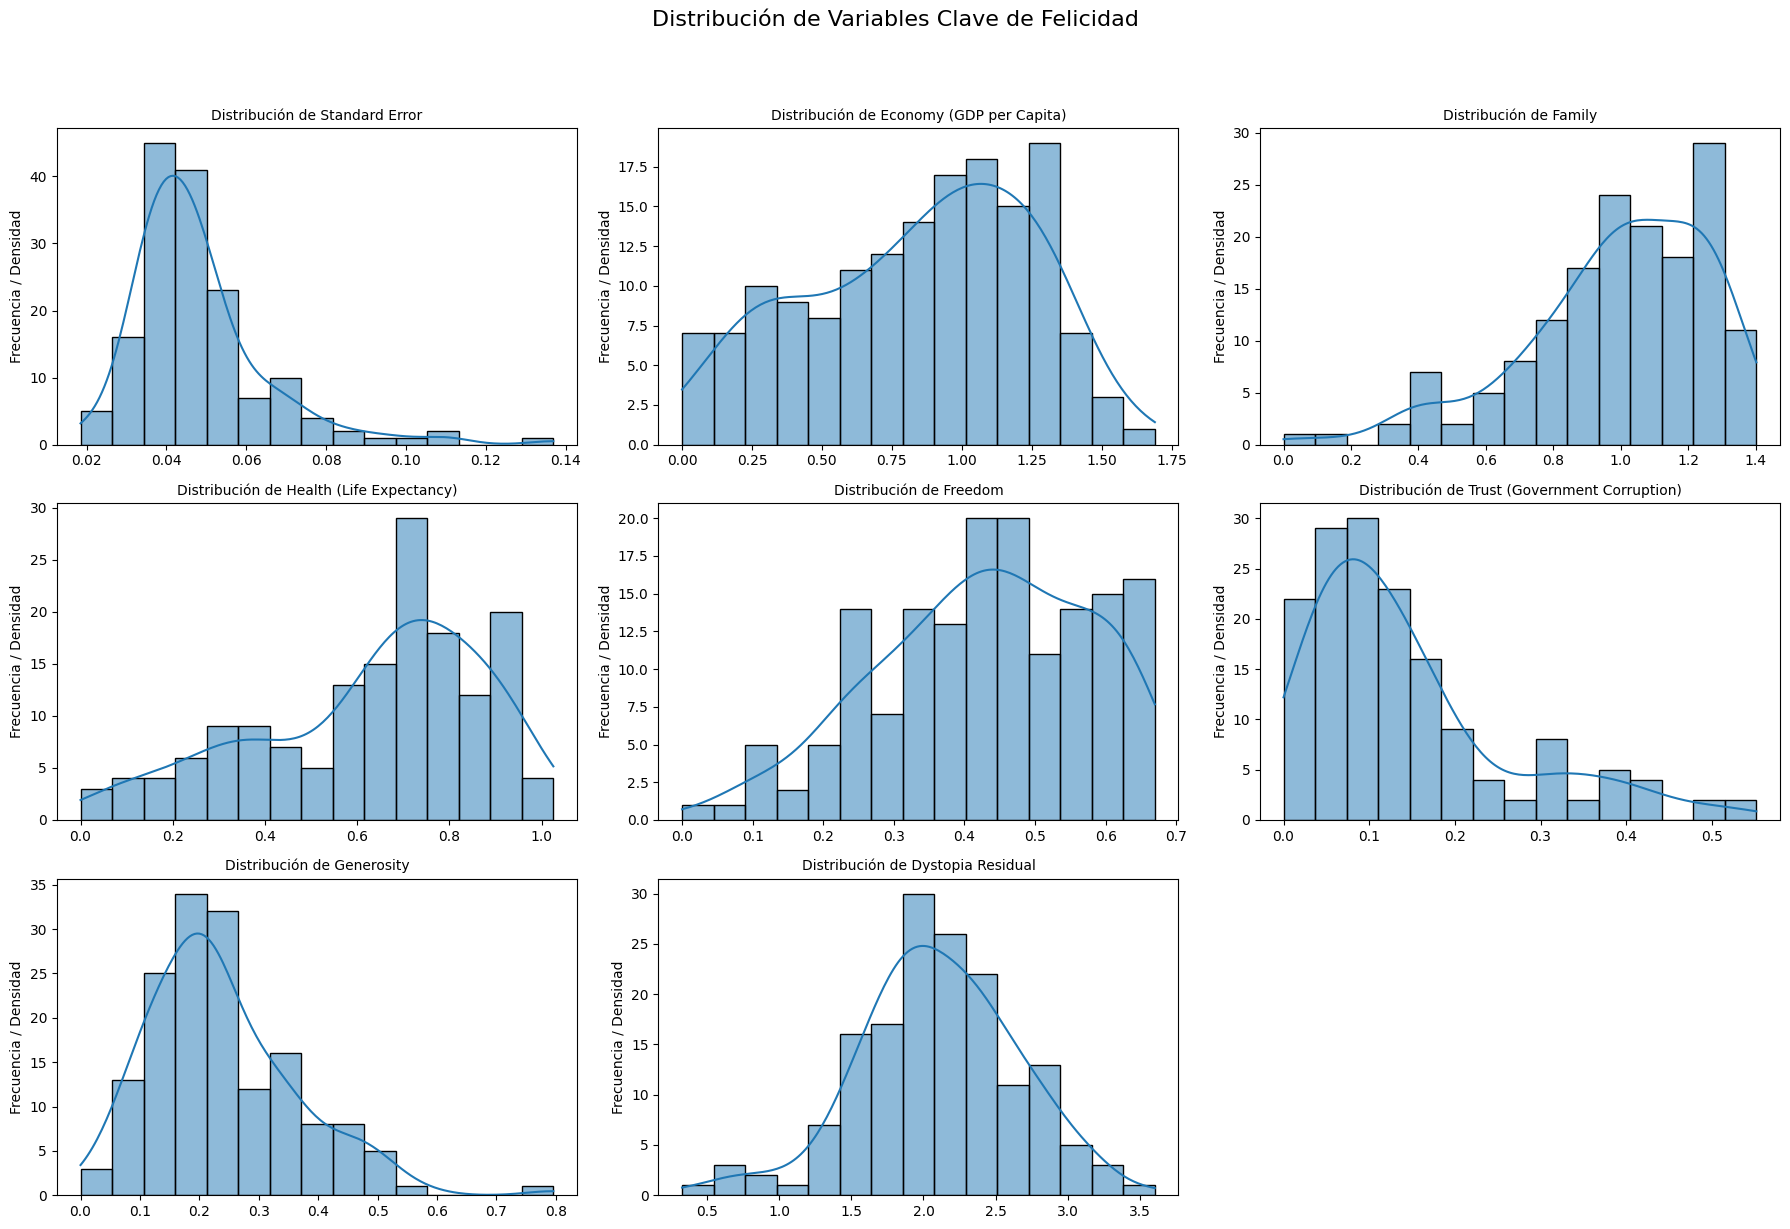

2025-05-20 17:44:37,803 - INFO - Matriz de histogramas/KDE mostrada.


In [14]:
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Generando matriz de histogramas/KDE para variables seleccionadas.")
    
    cols_for_hist = [
        'Standard Error','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'
    ]
    
    # Determinar el número de filas y columnas para la matriz de subplots
    n_cols = 3
    n_rows = (len(cols_for_hist) + n_cols - 1) // n_cols # Cálculo para el número de filas necesarias
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    fig.suptitle('Distribución de Variables Clave de Felicidad', fontsize=16, y=1.02)
    axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente

    for i, col in enumerate(cols_for_hist):
        sns.histplot(df_2015[col], kde=True, ax=axes[i], bins=15) # kde=True añade la curva de densidad
        axes[i].set_title(f'Distribución de {col}', fontsize=10)
        axes[i].set_xlabel('') # Opcional: quitar etiquetas x para no saturar
        axes[i].set_ylabel('Frecuencia / Densidad')

    # Ocultar ejes no utilizados si el número de gráficos no es un múltiplo perfecto de n_cols
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
    logging.info("Matriz de histogramas/KDE mostrada.")

else:
    logging.info("Error (simulado como info): El DataFrame df_2015 no está cargado. Ejecuta la celda de carga primero.")

In [15]:
# --- Boxplots Horizontales para Identificación de Outliers (df_2015) ---
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Generando boxplots horizontales para identificar outliers en variables numéricas principales de df_2015.")

    # Columnas que queremos graficar, si existen en df_2015
    actual_cols_for_boxplot = [col for col in cols_for_boxplot if col in df_2015.columns]

    if not actual_cols_for_boxplot:
        logging.warning("No hay columnas seleccionadas para generar boxplots en df_2015.")
    else:
        # Configuración de layout
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_boxplot) + n_cols_plot - 1) // n_cols_plot

        # Paleta pastel
        pastel_palette = sns.color_palette("pastel")

        plt.figure(figsize=(18, n_rows_plot * 3.5))
        plt.suptitle(
            'Boxplots Horizontales de Variables Numéricas para Identificación de Outliers (Dataset 2015)',
            fontsize=16,
            y=1.02
        )

        for i, col in enumerate(actual_cols_for_boxplot):
            ax = plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            sns.boxplot(
                x=df_2015[col],
                color=pastel_palette[i % len(pastel_palette)],
                orient='h',
                ax=ax
            )
            ax.set_title(col, fontsize=12)
            ax.set_xlabel('')    # Sin etiqueta X
            ax.set_ylabel('')    # Sin etiqueta Y
            ax.tick_params(axis='x', labelsize=9)
            ax.tick_params(axis='y', left=False, labelleft=False)

        # Ocultar ejes no utilizados
        total_plots = n_rows_plot * n_cols_plot
        for j in range(len(actual_cols_for_boxplot), total_plots):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Boxplots horizontales generales generados y mostrados para df_2015.")
else:
    logging.error("El DataFrame df_2015 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-20 17:44:37,814 - INFO - Generando boxplots horizontales para identificar outliers en variables numéricas principales de df_2015.


NameError: name 'cols_for_boxplot' is not defined

2025-05-18 21:11:29,907 - INFO - Calculando la frecuencia de países por región.



Frecuencia de Países por Región:
| Region                          |   count |
|:--------------------------------|--------:|
| Sub-Saharan Africa              |      40 |
| Central and Eastern Europe      |      29 |
| Latin America and Caribbean     |      22 |
| Western Europe                  |      21 |
| Middle East and Northern Africa |      20 |
| Southeastern Asia               |       9 |
| Southern Asia                   |       7 |
| Eastern Asia                    |       6 |
| North America                   |       2 |
| Australia and New Zealand       |       2 |


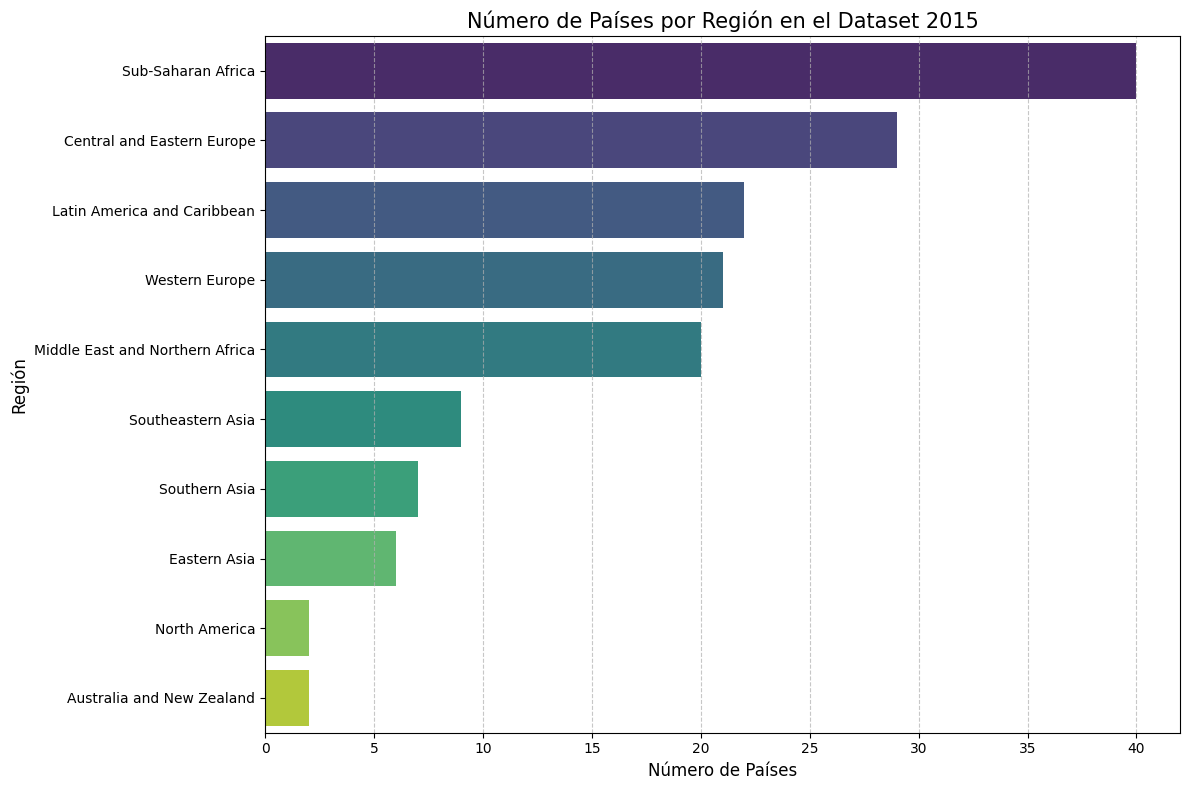

2025-05-18 21:11:30,065 - INFO - Frecuencia de países por región calculada y visualizada.


In [ ]:
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Calculando la frecuencia de países por región.")
    
    # Contar la frecuencia de cada región
    region_counts = df_2015['Region'].value_counts()
    
    print("\nFrecuencia de Países por Región:")
    print(region_counts.to_markdown())
    
    # Visualización de la frecuencia de países por región
    plt.figure(figsize=(12, 8))
    # Usar sns.barplot para mejor estética y ordenamiento automático por frecuencia
    sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis", hue=region_counts.index, legend=False)
    # Alternativa si quieres que las barras estén ordenadas de otra forma, o usar plt.barh:
    # region_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,7), color='skyblue')
    
    plt.title('Número de Países por Región en el Dataset 2015', fontsize=15)
    plt.xlabel('Número de Países', fontsize=12)
    plt.ylabel('Región', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Rejilla solo en el eje x para claridad
    plt.tight_layout()
    plt.show()
    
    logging.info("Frecuencia de países por región calculada y visualizada.")

else:
    logging.info("Error (simulado como info): El DataFrame df_2015 no está cargado. Ejecuta la celda de carga primero.")

2025-05-18 21:11:30,073 - INFO - Iniciando análisis de 'Happiness Score' por región con boxplot horizontal.
2025-05-18 21:11:30,084 - INFO - Estadísticas descriptivas del 'Happiness Score' por región calculadas.
2025-05-18 21:11:30,084 - INFO - Generando boxplot horizontal del 'Happiness Score' por región.



Estadísticas Descriptivas del 'Happiness Score' por Región (ordenado por media descendente):
| Region                          |   count |    mean |        std |   min |     25% |   50% |     75% |   max |
|:--------------------------------|--------:|--------:|-----------:|------:|--------:|------:|--------:|------:|
| Australia and New Zealand       |       2 | 7.285   | 0.00141421 | 7.284 | 7.2845  | 7.285 | 7.2855  | 7.286 |
| North America                   |       2 | 7.273   | 0.217789   | 7.119 | 7.196   | 7.273 | 7.35    | 7.427 |
| Western Europe                  |      21 | 6.68962 | 0.824582   | 4.857 | 6.302   | 6.937 | 7.378   | 7.587 |
| Latin America and Caribbean     |      22 | 6.14468 | 0.72856    | 4.518 | 5.8405  | 6.149 | 6.646   | 7.226 |
| Eastern Asia                    |       6 | 5.62617 | 0.554053   | 4.874 | 5.2235  | 5.729 | 5.98625 | 6.298 |
| Middle East and Northern Africa |      20 | 5.4069  | 1.10138    | 3.006 | 4.70775 | 5.262 | 6.324   | 7.278 |
| 

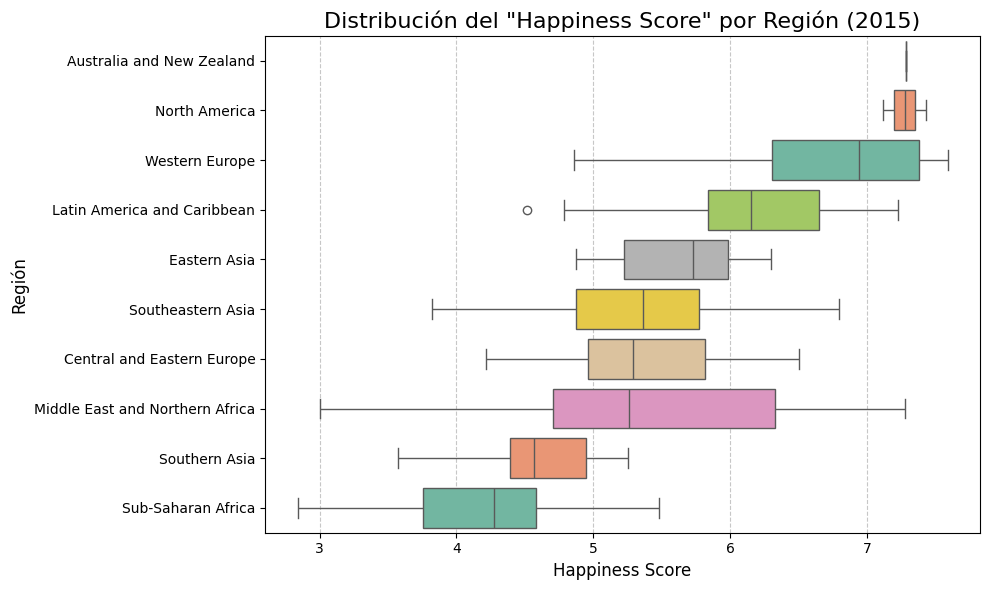

2025-05-18 21:11:30,246 - INFO - Boxplot horizontal del 'Happiness Score' por región mostrado.


In [ ]:
if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Iniciando análisis de 'Happiness Score' por región con boxplot horizontal.")

    # 1. Estadísticas Descriptivas del Happiness Score por Región (opcional, pero útil para referencia)
    #    Si no quieres imprimir esto cada vez, puedes comentarlo.
    happiness_by_region_stats = df_2015.groupby('Region')['Happiness Score'].describe()
    happiness_by_region_stats = happiness_by_region_stats.sort_values(by='mean', ascending=False)
    
    print("\nEstadísticas Descriptivas del 'Happiness Score' por Región (ordenado por media descendente):")
    print(happiness_by_region_stats.to_markdown())
    logging.info("Estadísticas descriptivas del 'Happiness Score' por región calculadas.")

    # 2. Visualización con Diagrama de Caja (Boxplot) Horizontal
    logging.info("Generando boxplot horizontal del 'Happiness Score' por región.")
    plt.figure(figsize=(10, 6)) # Ajustar el tamaño si es necesario, especialmente la altura para más regiones
    
    # Ordenar las regiones por la mediana del Happiness Score para el boxplot
    region_order_bp = df_2015.groupby('Region')['Happiness Score'].median().sort_values(ascending=False).index
    
    # Para un boxplot horizontal, 'Happiness Score' va en el eje x y 'Region' en el eje y
    sns.boxplot(data=df_2015, x='Happiness Score', y='Region', order=region_order_bp, hue='Region', legend=False, palette='Set2') 
    # Cambié a 'viridis' como en la celda anterior para consistencia, pero puedes usar 'Set2' si prefieres.
    
    plt.title('Distribución del "Happiness Score" por Región (2015)', fontsize=16)
    plt.xlabel('Happiness Score', fontsize=12)
    plt.ylabel('Región', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10) # Ajustar tamaño de fuente de las etiquetas de las regiones si es necesario
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Rejilla vertical para leer los scores
    plt.tight_layout()
    plt.show()
    logging.info("Boxplot horizontal del 'Happiness Score' por región mostrado.")

    # La sección del violinplot la omito ya que la solicitud se centró en el boxplot horizontal.
    # Si aún quieres el violinplot, podemos añadirlo de forma similar.

else:
    logging.info("Error (simulado como info): El DataFrame df_2015 no está cargado. No se puede generar el gráfico de distribución de Happiness Score por región.")

2025-05-18 21:11:30,257 - INFO - Generando matriz de boxplots horizontales por región para métricas de felicidad.
2025-05-18 21:11:30,293 - INFO - Generando boxplot para: Standard Error
2025-05-18 21:11:30,370 - INFO - Generando boxplot para: Economy (GDP per Capita)
2025-05-18 21:11:30,450 - INFO - Generando boxplot para: Family
2025-05-18 21:11:30,529 - INFO - Generando boxplot para: Health (Life Expectancy)
2025-05-18 21:11:30,745 - INFO - Generando boxplot para: Freedom
2025-05-18 21:11:30,818 - INFO - Generando boxplot para: Trust (Government Corruption)
2025-05-18 21:11:30,888 - INFO - Generando boxplot para: Generosity
2025-05-18 21:11:30,963 - INFO - Generando boxplot para: Dystopia Residual


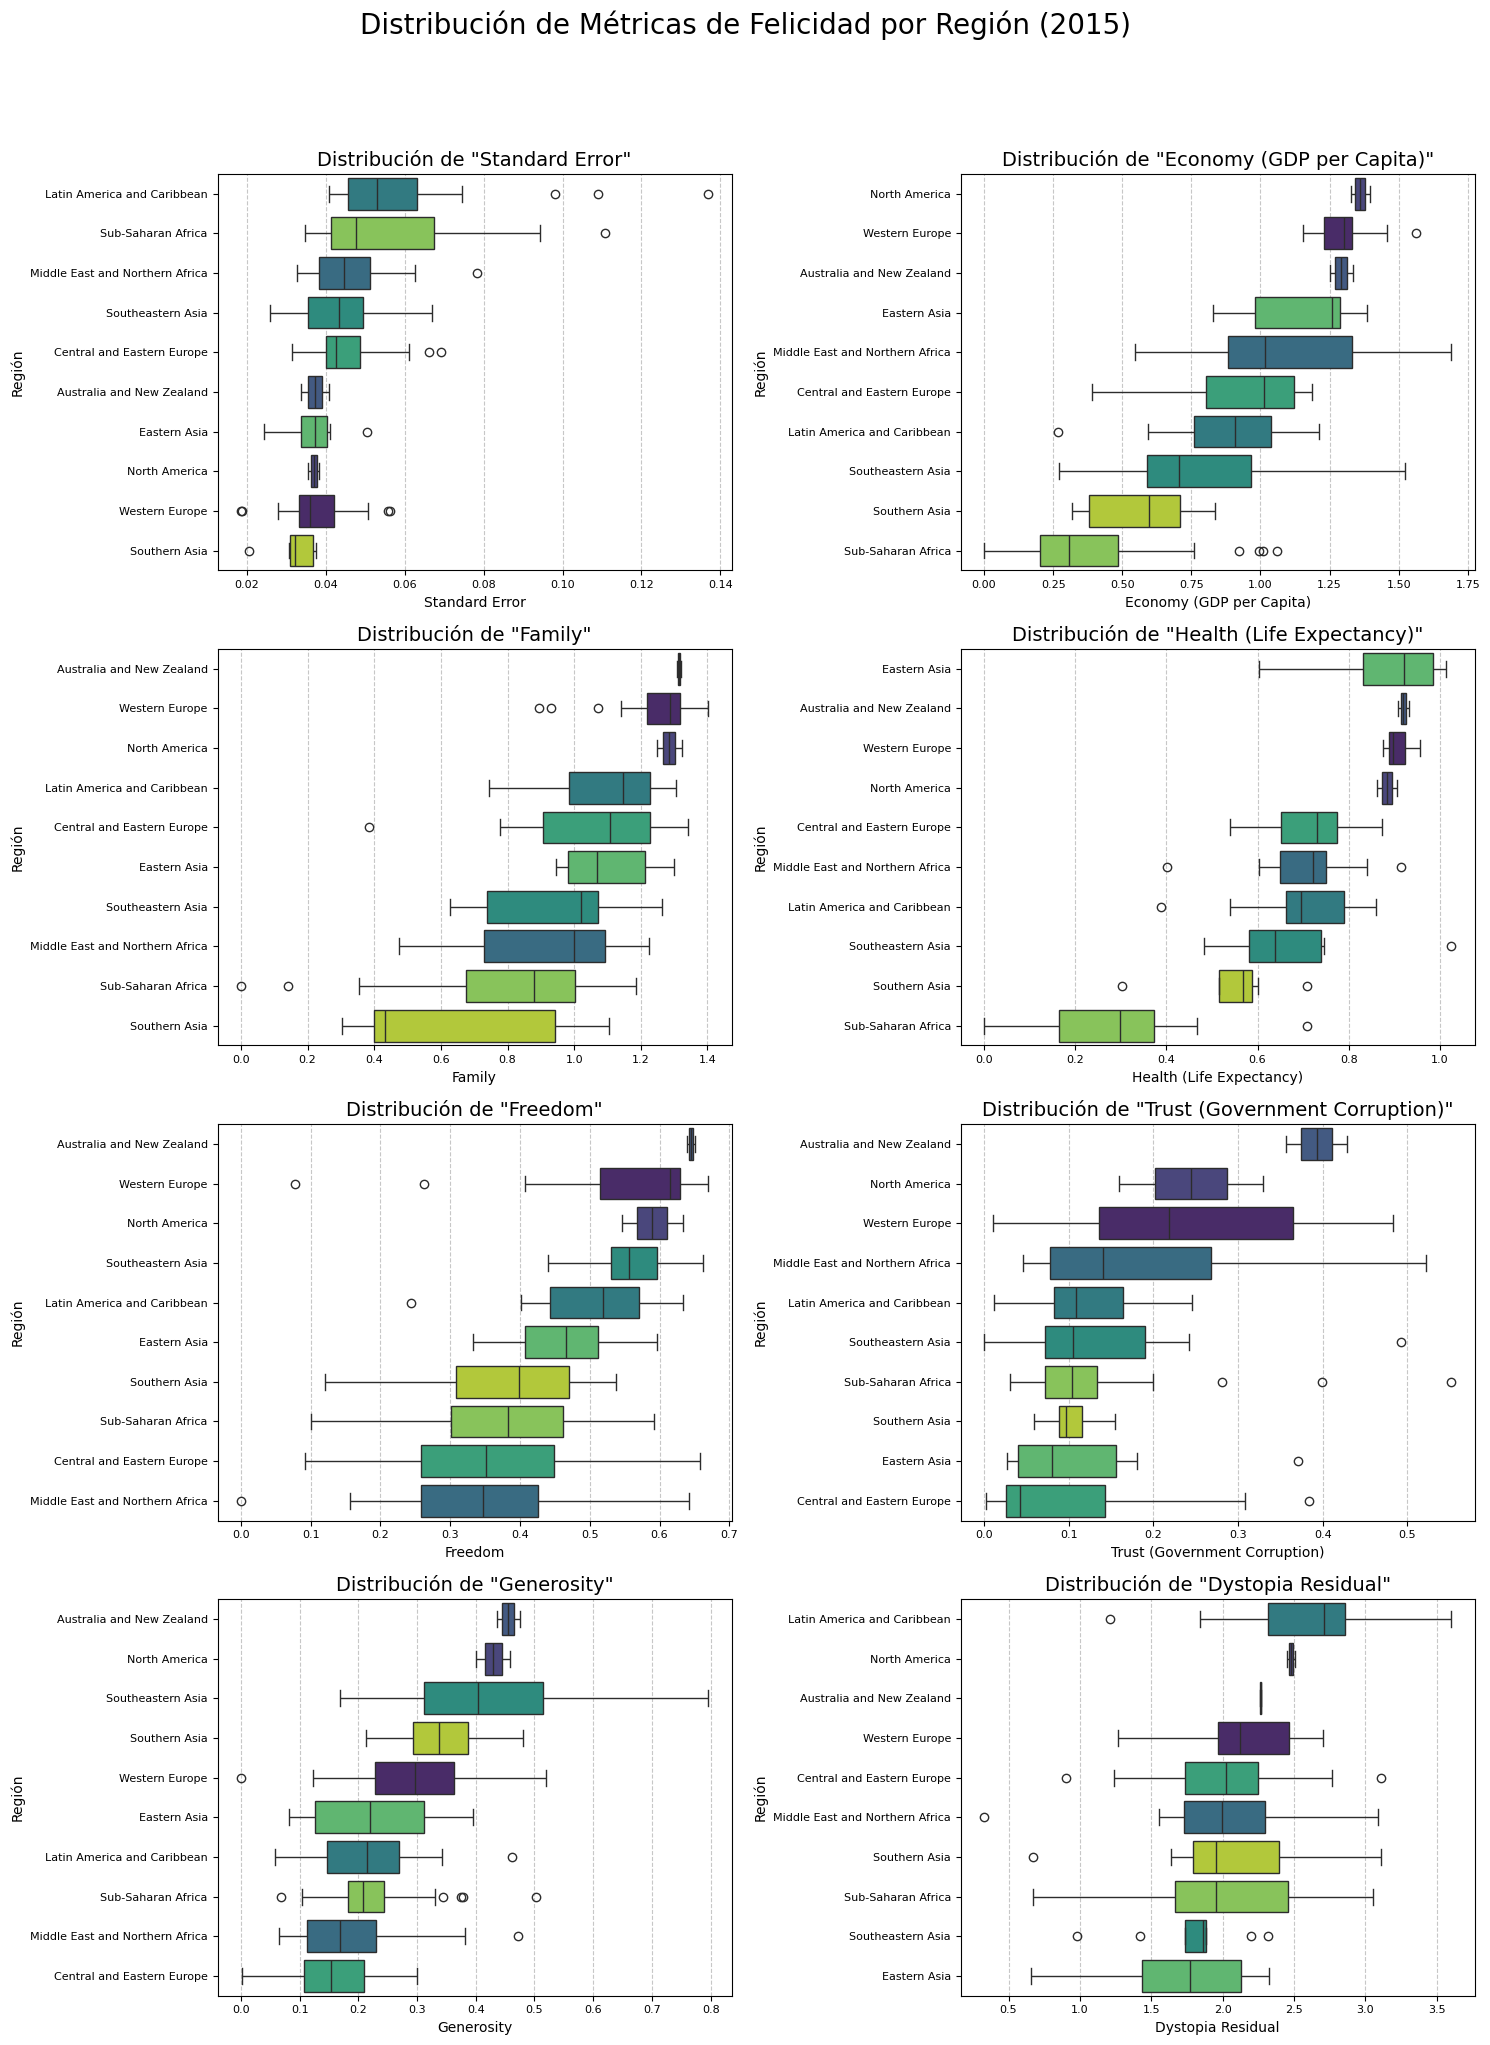

2025-05-18 21:11:31,692 - INFO - Matriz de boxplots horizontales por región mostrada.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os

# --- Asumiendo que df_2015 está cargado y logging configurado ---
# logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(filename)s:%(lineno)d - %(message)s", handlers=[logging.StreamHandler()])

if 'df_2015' in locals() and df_2015 is not None:
    logging.info("Generando matriz de boxplots horizontales por región para métricas de felicidad.")
    
    metrics_to_plot = [
        'Standard Error', 
        'Economy (GDP per Capita)', 
        'Family', 
        'Health (Life Expectancy)', 
        'Freedom', 
        'Trust (Government Corruption)', 
        'Generosity', 
        'Dystopia Residual'
    ]
    
    # Excluir 'Happiness Score' si está en la lista (aunque ya lo graficaste)
    # y 'Happiness Rank' que no suele ser útil para este tipo de distribución.
    metrics_to_plot = [m for m in metrics_to_plot if m not in ['Happiness Score', 'Happiness Rank']]

    n_metrics = len(metrics_to_plot)
    n_cols = 2
    n_rows = (n_metrics + n_cols - 1) // n_cols # Cálculo para el número de filas necesarias (4 en este caso)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) # Ajusta el tamaño según sea necesario
    fig.suptitle('Distribución de Métricas de Felicidad por Región (2015)', fontsize=20, y=1.02)
    axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente

    for i, metric in enumerate(metrics_to_plot):
        logging.info(f"Generando boxplot para: {metric}")
        
        # Ordenar las regiones por la mediana de la métrica actual
        region_order = df_2015.groupby('Region')[metric].median().sort_values(ascending=False).index
        
        sns.boxplot(data=df_2015, x=metric, y='Region', order=region_order, ax=axes[i], hue='Region', legend=False, palette='viridis')
        
        axes[i].set_title(f'Distribución de "{metric}"', fontsize=14)
        axes[i].set_xlabel(metric, fontsize=10)
        axes[i].set_ylabel('Región', fontsize=10)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)
        axes[i].grid(axis='x', linestyle='--', alpha=0.7)

    # Ocultar ejes no utilizados si el número de gráficos no es un múltiplo perfecto de n_cols
    # En este caso, si tenemos 7 métricas, el 8vo subplot (índice 7) quedará vacío.
    for j in range(n_metrics, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar layout para que el suptitle no se superponga
    plt.show()
    logging.info("Matriz de boxplots horizontales por región mostrada.")

else:
    logging.info("Error (simulado como info): El DataFrame df_2015 no está cargado. No se puede generar el gráfico.")